## Figuritas

### Guillermo Moncecchi (@gmonce)

Estamos muy entusiasmados en mi familia juntando el álbum del Mundial 2014, que Uruguay seguramente ganará. Hace días que me venía preguntando cómo cambiaba la probabilidad de sacar una repetida del sobre, a medida que iba llenando el álbum. No es demasiado complicado, aquí va mi razonamiento, así jugamos un poco con probabilidades y con los ipython notebooks. Empecemos por importar el ambiente:

In [112]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


El álbum tiene 640 figuritas, y el sobre siempre trae 5:

In [113]:
# Número de figuritas total en el álbum
n_total=640.0

# Figuritas en un sobre
n_total_sobre=5

Lo que tengo que hacer es calcular la probabilidad de que salga una repetida de un sobre. Eso, primero que nada, depende de 3 parámetros: el número total de figuritas, la cantidad que tengo, el número de figuritas que vienen en el sobre. Para sacar $k$ repetidas, necesito que haya k que ya tengo (lo cual ocurre en forma proporcional a la cantidad que ya tengo, cuantas más tenga, más posible es que salga una repetida), y 5-k que _no_ tengo. Eso puede ocurrir de varias formas, así que tengo que considerar las combinaciones de 5 figuritas, tomadas de a k. Aquí la función "intuitiva"

In [114]:

from scipy.misc import comb

# Probabilidad de que en un sobre aparezcan i figuritas repetidas
def prob_repetidas(n_total,n_tengo,n_total_sobre,i):
        prob_i_repetidas=comb(n_total_sobre,i)*(n_tengo/n_total)**i*((n_total-n_tengo)/n_total)**(n_total_sobre-i)

        return prob_i_repetidas

Supongamos que tengo 150 figuritas, veamos la probabilidad de sacar exactamente una repetida:

In [115]:
print "Probablidad de una repetida:",prob_repetidas(n_total,150,n_total_sobre,1)

Probablidad de una repetida: 0.40266669821


Pero a mí me interesa saber la probabilidad de que haya _alguna_ repetida, así que tengo que sumar las probabilidades de que haya entre 1 y 5 repetidas

In [116]:
# Probabilidad de que en un sobre haya por lo menos una repetida
def prob_alguna_repetida(n_total,n_tengo,n_total_sobre):
        a=np.array([prob_repetidas(n_total,n_tengo,n_total_sobre,x) for x in range(n_total_sobre+1)])
        return sum(a[1:])
    
print "Probabilidad de alguna repetida:",prob_alguna_repetida(n_total,150,n_total_sobre)

Probabilidad de alguna repetida: 0.736924423836


O sea que si tengo 150 figuritas, la probabilidad de sacar alguna repetida es del 73% (y eso que tengo menos de la cuarta parte de las figuritas). *Nota: tal vez el lector avispado haya notado que esto no está completamente bien, ya que la cantidad de figuritas que tengo cambia luego de sacada una nueva en caso de no ser repetida. Pero como $5<<640$ y les aseguro que incorporar esto complica mucho las cuentas, hagámonos los distraídos que no parece afectar mucho.* 

Ahora, grafiquemos cómo se complica nuestra vida a medida que vamos llenando el álbum:

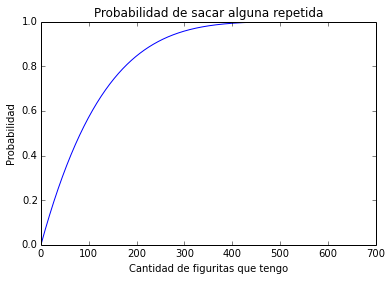

In [117]:
# Grafico cantidad que tengo versus la probabilidad de sacar alguna repetida
p_repetidas=[prob_alguna_repetida(n_total,i,n_total_sobre) for i in np.arange(n_total+1)]

plt.title('Probabilidad de sacar alguna repetida')
plt.xlabel('Cantidad de figuritas que tengo')
plt.ylabel('Probabilidad')
pl=plt.plot(np.arange(n_total+1),p_repetidas)


Siempre me pregunté por qué la insistencia en los libros o cursos de probabilidad y estadística por listar distribuciones típicas y sacar un montón de medidas. La respuesta: para no reinventar la rueda. Si pensamos un poco, sacar una figurita es como tirar una moneda: en este caso sacar cara es sacar una repetida, y número sacar una que no tengo. Y la probabilidad de la ocurrencia de uno u otro depende de la cantidad de figuritas, dividido el total de figuritas del álbum (llamemos $p$ a este número). El número de figuritas repetidas es una [distribución binominal](http://es.wikipedia.org/wiki/Distribuci%C3%B3n_binomial) $B(n,p)$, con parámetros n=5 (número de ensayos, es decir de figuritas en el sobre). Vamos a verificarlo, recalculando la probabilidad de sacar una repetida, esta vez usando la distribución:

In [118]:
from scipy.stats import binom
n=n_total_sobre
p=150/n_total
rv = binom(n, p)
print "Probabilidad de alguna repetida, versión distribución binomial:",rv.pmf(1)

Probabilidad de alguna repetida, versión distribución binomial: 0.40266669821


Mucho más fácil (y seguro...). Y gracias a que en los libros (y en las bibliotecas...) ya tenemos calculadas ciertas estadísticas sobre ciertas distribuciones, utilizando la esperanza podemos ver la cantidad de figuritas repetidas que espero sacar cada vez que compro un sobre:

In [119]:
print "Esperanza del número de repetidas:",rv.mean()

Esperanza del número de repetidas: 1.171875


Veamos cómo varía la esperanza dependiendo de la cantidad de figuritas que tengo en el álbum

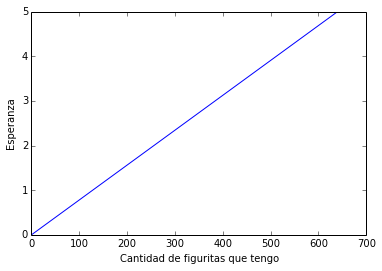

In [120]:

def esperanza_repetidas(n_total_sobre,n_tengo,n_total):
    p=n_tengo/n_total
    rv=binom(n_total_sobre,p)
    return rv.mean()
#print esperanza_repetidas(640.0,0
p_esperanzas_repetidas=[esperanza_repetidas(n_total_sobre,i,n_total) for i in np.arange(n_total+1)]


plt.xlabel('Cantidad de figuritas que tengo')
plt.ylabel('Esperanza')
pl=plt.plot(np.arange(n_total+1),p_esperanzas_repetidas)
#plt.title('Esperanza de repetidas según las figuritas que tengo')


Mirá vos. Es lineal. Y tiene sentido, porque la esperanza de una binomial es $np$, o sea que para este caso sería $5*p$.

Ahora, ¿cuál sería la distribución de probabilidad que dibujamos, equivalente a la probabilidad de tener _alguna_ repetida?. Fácil: es 1 - la probabilidad de no tener ninguna. ¿Y cuál es la probabilidad de no tener ninguna? Simplemente $p^5$. Ya me parecía que esa función tenía todo el aspecto de una exponencial.

Podemos saber a partir de qué momento ``lo más probable'' es que salga una repetida al menos: simplemente, veamos cuándo la función de esperanza es mayor a uno. Y ya que estamos, calculemos el intervalo que se lleva el 95% de la probabilidad 

In [121]:
print "Número en el que la esperanza es 1:",p_esperanzas_repetidas.index(1)

Número en el que la esperanza es 1: 128


In [122]:
p=p_esperanzas_repetidas.index(1)/n_total
rv=binom(n_total_sobre,p)
print "Intervalo que concentra el 95% de la probabilidad para ese caso:",rv.interval(0.95)

Intervalo que concentra el 95% de la probabilidad para ese caso: (0.0, 3.0)


Es decir que si tenemos 128 figuritas, la esperanza de sacar una repetida es mayor a uno, pero en el 95% de los casos vamos a sacar máximo tres repetidas. 
